# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Estimation of mean

* Load data
* Make assumptions
* Estimate mean
* Write down confidence interval

In [1]:
%%bash
ls data

CORIS.csv
NYPowerBall.csv
auto.csv
co2_mm_mlo.txt
digits.csv
earthquakes.csv
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
flights.csv
indoor_train.csv
leukemia.csv
mammography.mat
portland.csv
pride_and_prejudice.txt
rainfallInChristchurch.csv
ratings.csv
spam.csv
visits_clean.csv


In [2]:
%%bash
head -n 2 data/NYPowerBall.csv

Draw Date,Winning Numbers,Multiplier
02/09/2019,01 02 03 07 39 25,3


In [3]:
import csv

with open("data/NYPowerBall.csv",mode='r') as f:
    reader = csv.reader(f)
    header = next(reader)
    #data = [i for i in reader]
    data = list(reader)

In [4]:
data[:2]

[['02/09/2019', '01 02 03 07 39 25', '3'],
 ['02/06/2019', '05 13 28 38 63 21', '5']]

In [5]:
list_list_list = [line[1].split(' ') for line in data]

In [6]:
list_list_list[:2]

[['01', '02', '03', '07', '39', '25'], ['05', '13', '28', '38', '63', '21']]

In [7]:
flattened_list = sum(list_list_list,[])

In [8]:
import numpy as  np
list_list_list_arr = np.array(list_list_list)

In [9]:
list_list_list_arr.flatten().shape

(5646,)

In [10]:
int_list = [int(i) for i in flattened_list]

In [11]:
int_list[:2]

[1, 2]

In [12]:
int_arr = np.array(int_list)

In [13]:
int_arr.shape

(5646,)

In [14]:
np.max(int_arr)

69

In [15]:
np.min(int_arr)

1

In [16]:
len(np.unique(int_arr))

69

### Assumption about data

* IID (Independent and identically distributed), is this really true?
* The n:th draw of the m:th trial is IID but not the n and n-1 for instance.
* Discrete distribution with all numbers between 1 and 69.

### What to do

Compute confidence interval of what?
* The mean of the first draw
* Hoeffdings inequality, $a = 1$ and $b=69$

In [17]:
reshaped_int_arr = int_arr.reshape(-1,6)

In [18]:
first_draws = reshaped_int_arr[:,0]

In [19]:
list_list_list[:10]

[['01', '02', '03', '07', '39', '25'],
 ['05', '13', '28', '38', '63', '21'],
 ['10', '17', '18', '43', '65', '13'],
 ['02', '12', '16', '29', '54', '06'],
 ['08', '12', '20', '21', '32', '10'],
 ['23', '25', '47', '48', '50', '24'],
 ['05', '08', '41', '65', '66', '20'],
 ['14', '29', '31', '56', '61', '01'],
 ['07', '36', '48', '57', '58', '24'],
 ['06', '19', '37', '49', '59', '22']]

In [20]:
np.unique(first_draws)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 48, 50])

In [21]:
# Double check
np.unique([int(i[5]) for i in list_list_list])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [22]:
power_ball = reshaped_int_arr[:,-1]

In [23]:
power_ball_mean = np.mean(power_ball)
power_ball_mean

17.14452709883103

In [24]:
39/2

19.5

Hoeffdings inequality $P(X \in [a,b]) = 1$
$$
    P(|\overline{X}_n - E[X]| > \epsilon) \leq 2 e^{-\frac{2 n \epsilon^2}{(a-b)^2}}
$$

$$
    \alpha = 2 e^{-\frac{2 n \epsilon^2}{(a-b)^2}}
$$

$$
    \epsilon = \sqrt{\frac{(a-b)^2}{2n}\ln(2/\alpha)}
$$

In [25]:
def compute_epsilon(n,a,b,alpha):
    return np.sqrt((a-b)**2/(2*n) * np.log(2/alpha))

In [26]:
alpha = 0.05
a = 1
b = 39
n = len(power_ball)
epsilon = compute_epsilon(n,a,b,alpha)
epsilon

1.6823680763069317

In [27]:
(power_ball_mean-epsilon,power_ball_mean+epsilon)

(15.462159022524098, 18.826895175137963)

In [28]:
(39+1)/2

20.0

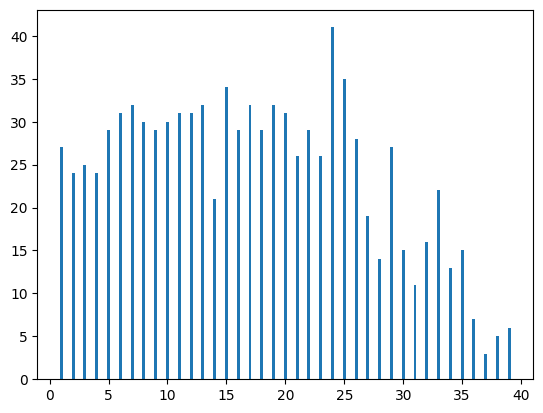

In [29]:
from Utils import discrete_histogram
discrete_histogram(power_ball)

# Likelihood of parameter

* Load data
* Work with dates
* Make assumptions
* Write down the Risk
* Split into two parts
* Minimize the risk numerically on train
* Test the risk on test
* Make confidence intervals

In [30]:
%%bash
ls data

CORIS.csv
NYPowerBall.csv
auto.csv
co2_mm_mlo.txt
digits.csv
earthquakes.csv
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
flights.csv
indoor_train.csv
leukemia.csv
mammography.mat
portland.csv
pride_and_prejudice.txt
rainfallInChristchurch.csv
ratings.csv
spam.csv
visits_clean.csv


In [31]:
%%bash
head -n 2 data/earthquakes.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0


In [32]:
import csv

with open("data/earthquakes.csv",mode='r') as f:
    reader = csv.reader(f,skipinitialspace=True)
    header = next(reader)
    #data = [i for i in reader]
    data = list(reader)

In [33]:
print(header[2],data[0][2])

origintime 2018-05-17T12:19:35.516Z


In [34]:
format_string = "%Y-%m-%dT%H:%M:%S.%fZ"

In [35]:
from datetime import datetime
datetime.strptime(data[0][2],format_string)

datetime.datetime(2018, 5, 17, 12, 19, 35, 516000)

In [36]:
origin_time = [datetime.strptime(line[2],format_string) for line in data]

In [37]:
(origin_time[0]-origin_time[1]).total_seconds()

2470.87

In [38]:
origin_time_arr = np.array(origin_time)

In [39]:
sorted_origin_time = np.sort(origin_time_arr)

In [40]:
sorted_origin_time[1:]-sorted_origin_time[:-1]

array([datetime.timedelta(seconds=530, microseconds=184000),
       datetime.timedelta(seconds=551, microseconds=417000),
       datetime.timedelta(seconds=764, microseconds=156000), ...,
       datetime.timedelta(seconds=2700, microseconds=148000),
       datetime.timedelta(seconds=3098, microseconds=120000),
       datetime.timedelta(seconds=2470, microseconds=870000)],
      dtype=object)

In [41]:
time_between = np.diff(sorted_origin_time)

In [42]:
time_between_seconds = [time.total_seconds() for time in time_between]

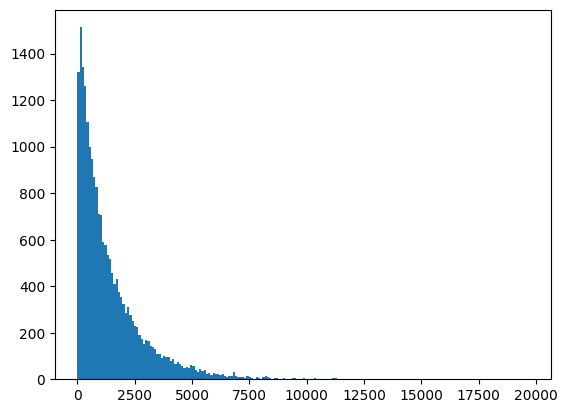

In [43]:
import matplotlib.pyplot as plt
_=plt.hist(time_between_seconds,bins=200)

We construct the model space $\mathcal{M} = \{f_\lambda(x) = \lambda e^{-\lambda x}: \lambda > 0\}$

Now define the log-loss
$$
    L(f_\lambda,x) = -\ln(f_\lambda(x))
$$

The risk is the expected loss
$$
    R(f_\lambda) = E[L(f_\lambda,X)]
$$

We instead minimize the empirical risk, given i.i.d. Data $X = \{X_1,\ldots,X_n\}$
$$
    \hat R_n(f_\lambda) = \frac{1}{n} \sum_{i=1}^n L(f_\lambda,X_i)
$$

The goal is to minimize $\hat R_n(f_\lambda)$ w.r.t. $\lambda$. 

$$
    \ln(f_\lambda) = \ln(\lambda) - \lambda x
$$

$$
    \hat R_n(f_\lambda) = \frac{1}{n} \sum_{i=1}^n (\lambda X_i - \ln(\lambda))
$$

$$
    \frac{d}{d\lambda} 
    \hat R_n(f_\lambda) = \frac{1}{n} \sum_{i=1}^n (X_i - 1/\lambda)
$$

$$
    \frac{d}{d\lambda} 
    \hat R_n(f_\lambda) = 0
$$
gives
$$
    1/\hat \lambda = \frac{1}{n} \sum_{i=1}^n X_i
$$

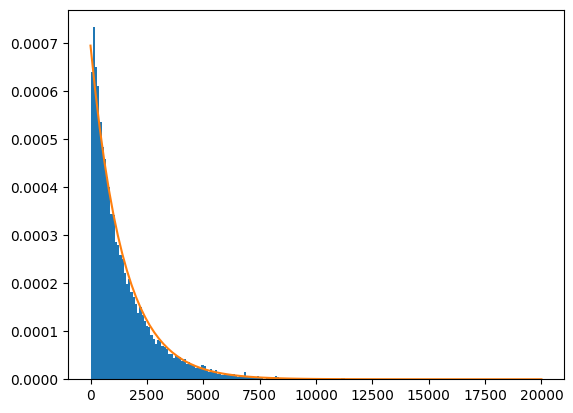

In [44]:
import matplotlib.pyplot as plt
_=plt.hist(time_between_seconds,bins=200,density=True)
hat_lambda = 1/np.mean(time_between_seconds)
x_plot = np.linspace(0,20000,100)
plt.plot(x_plot,hat_lambda*np.exp(-hat_lambda*x_plot))

Lets say I want to predict the time to next earthquake, lets say that we use our estimated $\hat \lambda$ to predict $1/\hat \lambda$.

Train, testing split. But for us, using the iid assumption we can just randomly split our dataset into two parts.

In [45]:
n_train = int(len(time_between_seconds)/2)
train_set = time_between_seconds[:n_train]
test_set = time_between_seconds[n_train:]

In [46]:
hat_lambda_train = 1/np.mean(train_set)
guess = 1/hat_lambda_train

In [47]:
guess

1411.6221267726278

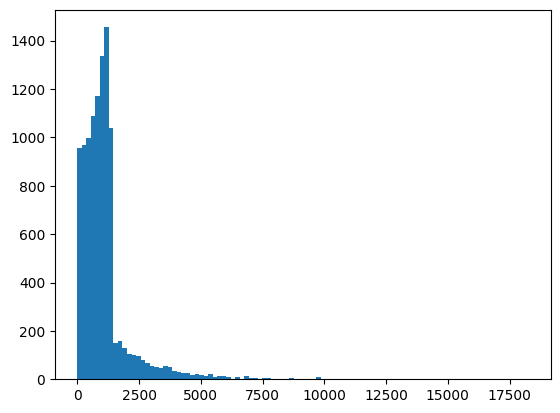

In [48]:
_=plt.hist(np.abs(guess-test_set),bins=100)

In [49]:
average_error = np.mean(np.abs(guess-test_set))
print(average_error)

1113.396468268911
